In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation

MovieWriter ffmpeg unavailable; using Pillow instead.


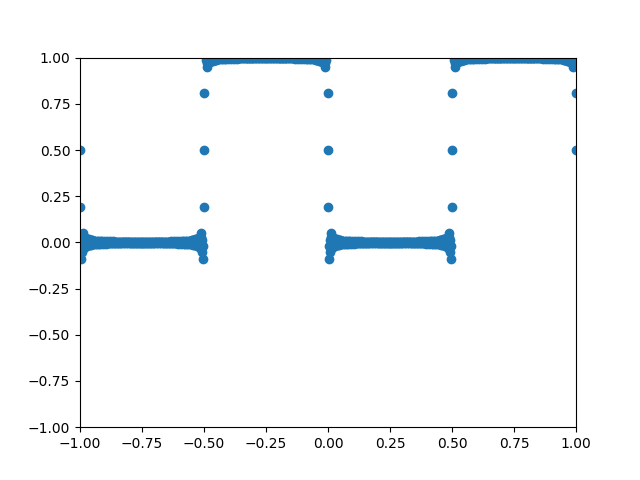

In [8]:
fig, ax = plt.subplots()              # create the figure
ax.set_xlim(-1, 1)              # and adjust axes limits and labels
ax.set_ylim(-1, 1)
t = np.linspace(-1,1,1001)            # set the time values to use
line, = ax.plot(t,np.zeros_like(t), 'o')   # create the trace, saving in a variable
                                      # Note the comma; the ax.plot call returns a list

def frame(n:int):
    y = np.zeros_like(t)              # initialize a vector of y values
    y += 0.5                          # start with the constant
    for i in range(1, n+1, 2):
        y -= 2 / (np.pi * i) * np.sin(2 * np.pi * i * t)
    line.set_ydata(y)                 # update the trace
    return line

ani = FuncAnimation(fig, frame, range(1, 82, 2), interval=100, blit=True)
ani.save("squarewave.gif", fps=10, dpi=100)

In [9]:
plt.close("all")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

#note: this method is likely not viable for super big simulations, like we have, 
#since camera has (i think) space complexity O(particles * frames)

numpoints = 100
points = np.random.random((2, numpoints))
camera = Camera(plt.figure())
for _ in range(100):
    points += 0.1 * (np.random.random((2, numpoints)) - .5)
    plt.scatter(*points, c="b", s=3)
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.gif')

In [17]:
plt.close("all")

In [ ]:
fig, ax = plt.subplots()
points, = ax.plot(np.random.rand(10), 'o')
ax.set_ylim(0, 1)

def update(data):
    points.set_ydata(data)
    return points,

def generate_points():
    while True:
        yield np.random.rand(10)  # change this

ani = FuncAnimation(fig, update, generate_points, interval=300, save_count=200)
ani.save('animation.gif', writer='imagemagick', fps=4);
plt.show()